In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#extrayendo los datos
fallos=pd.read_csv("C:/Users/Rulig/OneDrive/Escritorio/apps/progra/python/PCD/heart_failure_clinical_records.csv")
columnas=fallos[:-1]
combinaciones = [(col1, col2) for col1 in columnas for col2 in columnas if col1 != col2]
fig, ax = plt.subplots(len(combinaciones), figsize=(5,3*len(combinaciones)))
for idx, (col1, col2) in enumerate(combinaciones):
  x=fallos[col1]
  y=fallos[col2]
  ax[idx].scatter(x, y, label=f'{col2} vs {col1}')
  ax[idx].legend()
  ax[idx].set_xlabel(col1)
  ax[idx].set_ylabel(col2)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def mean(dataset):
  return(sum(dataset)/len(dataset))

def calcular_varianza(datos):
    n = len(datos)
    media = sum(datos) / n
    suma_cuadrados = sum((x - media) ** 2 for x in datos)
    varianza = suma_cuadrados / (n - 1)  # Usamos (n-1) para la varianza muestral
    return varianza

def calcular_covarianza(X, Y):
    n = len(X)
    media_X = sum(X) / n
    media_Y = sum(Y) / n
    suma_productos = sum((X[i] - media_X) * (Y[i] - media_Y) for i in range(n))
    covarianza = suma_productos / (n - 1)  # Usamos (n-1) para la covarianza muestral
    return covarianza

def calcular_coeficiente_correlacion(X, Y):
    covarianza = calcular_covarianza(X, Y)
    desviacion_X = (calcular_varianza(X)) ** 0.5
    desviacion_Y = (calcular_varianza(Y)) ** 0.5
    coeficiente_correlacion = covarianza / (desviacion_X * desviacion_Y)
    return coeficiente_correlacion

def calcular_matrices_cov_cor(X, Y):
    # Calcula la covarianza
    n = len(X)
    media_X = sum(X) / n
    media_Y = sum(Y) / n
    suma_productos = sum((X[i] - media_X) * (Y[i] - media_Y) for i in range(n))
    covarianza = suma_productos / (n - 1)  # Usamos (n-1) para la covarianza muestral

    # Calcula la matriz de covarianzas
    matriz_covarianzas = [[0] * 2 for _ in range(2)]
    matriz_covarianzas[0][0] = calcular_varianza(X)
    matriz_covarianzas[1][1] = calcular_varianza(Y)
    matriz_covarianzas[0][1] = covarianza
    matriz_covarianzas[1][0] = covarianza

    # Calcula la matriz de correlación
    desviacion_X = (matriz_covarianzas[0][0]) ** 0.5
    desviacion_Y = (matriz_covarianzas[1][1]) ** 0.5
    matriz_correlacion = [[0] * 2 for _ in range(2)]
    matriz_correlacion[0][0] = 1.0
    matriz_correlacion[1][1] = 1.0
    matriz_correlacion[0][1] = covarianza / (desviacion_X * desviacion_Y)
    matriz_correlacion[1][0] = matriz_correlacion[0][1]

    return matriz_covarianzas, matriz_correlacion

def multimode(dataset):
    # Contar la frecuencia de cada número
    conteo = {}
    numeros={}
    dataseto=sorted(dataset)
    for num in dataseto:
        if num in conteo:
            conteo[num] += 1
        else:
            conteo[num] = 1
    maxfrecuency=max(conteo.values())
    numeros_sin_rep = [num for num, freq in conteo.items() if freq == maxfrecuency]
    return numeros_sin_rep,maxfrecuency
#extraccion de datos para analisis de la media y de la moda
fallos=pd.read_csv("C:/Users/Rulig/OneDrive/Escritorio/apps/progra/python/PCD/heart_failure_clinical_records.csv")
columnas=fallos[:-1]
metadata=[col for col in columnas]
print(metadata)
combinaciones = [(col1, col2) for col1 in columnas for col2 in columnas if col1 != col2]
for col in enumerate(metadata):
  print(col[1])
  x=fallos[col[1]]
  print("promedio:",mean(x))
  mode,freq=multimode(x)
  print("Moda de",mode,"con una frecuencia de ",freq)
  var=calcular_varianza(x)
  print("varianza",var)

for idx, (col1, col2) in enumerate(combinaciones):
  x=fallos[col1]
  y=fallos[col2]
  cov=calcular_covarianza(x,y)
  print("metadatos ",col1,col2)
  print("covarianza",cov)  
  corr=calcular_coeficiente_correlacion(x,y)
  print("coeficiente correlacion",corr)
  matcov,matcorr=calcular_matrices_cov_cor(x,y)
  print(matcorr)
  print(matcov)





['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
age
promedio: 60.28873639999996
Moda de [60.0] con una frecuencia de  581
varianza 136.82548936798605
anaemia
promedio: 0.4744
Moda de [0] con una frecuencia de  2628
varianza 0.24939451890380002
creatinine_phosphokinase
promedio: 586.7606
Moda de [582] con una frecuencia de  769
varianza 954009.2655407496
diabetes
promedio: 0.4394
Moda de [0] con una frecuencia de  2803
varianza 0.24637691538307405
ejection_fraction
promedio: 37.7346
Moda de [35] con una frecuencia de  771
varianza 132.59188121624263
high_blood_pressure
promedio: 0.3648
Moda de [0] con una frecuencia de  3176
varianza 0.2317673134626846
platelets
promedio: 265075.404369998
Moda de [263358.03] con una frecuencia de  395
varianza 9603952689.891945
serum_creatinine
promedio: 1.3691059999999975
Moda de [1.0] con una frecuencia de  8

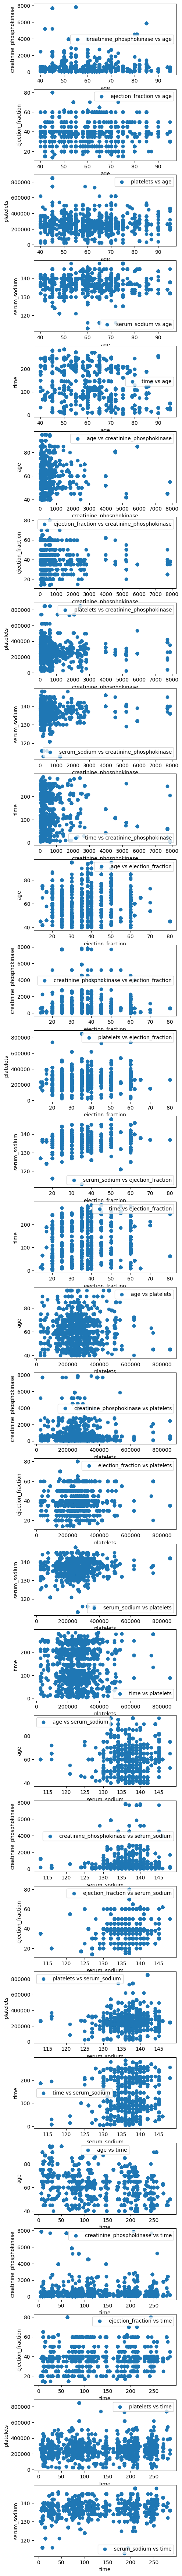

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def filtrado(metadata):
  id = np.zeros(len(metadata))
  for i, col in enumerate(metadata):
      x = fallos[col]
      cont = 0
      for j in range(len(x)):
          if x[j] == 1 or x[j] == 0:
              id[i] = 1
              break
  return id
fallos=pd.read_csv("C:/Users/Rulig/OneDrive/Escritorio/apps/progra/python/PCD/heart_failure_clinical_records.csv")
columnas=fallos[:-1]
metadata=[col for col in columnas]
resfil=filtrado(metadata)
metadata_filtradot = [col for i, col in enumerate(metadata) if resfil[i] == 1]
metadata_filtrado=[col for i, col in enumerate(metadata) if resfil[i] == 0]
combinaciones = [(col1, col2) for col1 in metadata_filtrado for col2 in metadata_filtrado if col1 != col2]
fig, ax = plt.subplots(len(combinaciones), figsize=(5,3*len(combinaciones)))

for idx, (col1, col2) in enumerate(combinaciones):
  x=fallos[col1]
  y=fallos[col2]
  ax[idx].scatter(x, y, label=f'{col2} vs {col1}')
  ax[idx].legend()
  ax[idx].set_xlabel(col1)
  ax[idx].set_ylabel(col2)    

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'time']
age
<class 'pandas.core.series.Series'>
creatinine_phosphokinase
<class 'pandas.core.series.Series'>
ejection_fraction
<class 'pandas.core.series.Series'>
platelets
<class 'pandas.core.series.Series'>
serum_sodium
<class 'pandas.core.series.Series'>
time
<class 'pandas.core.series.Series'>


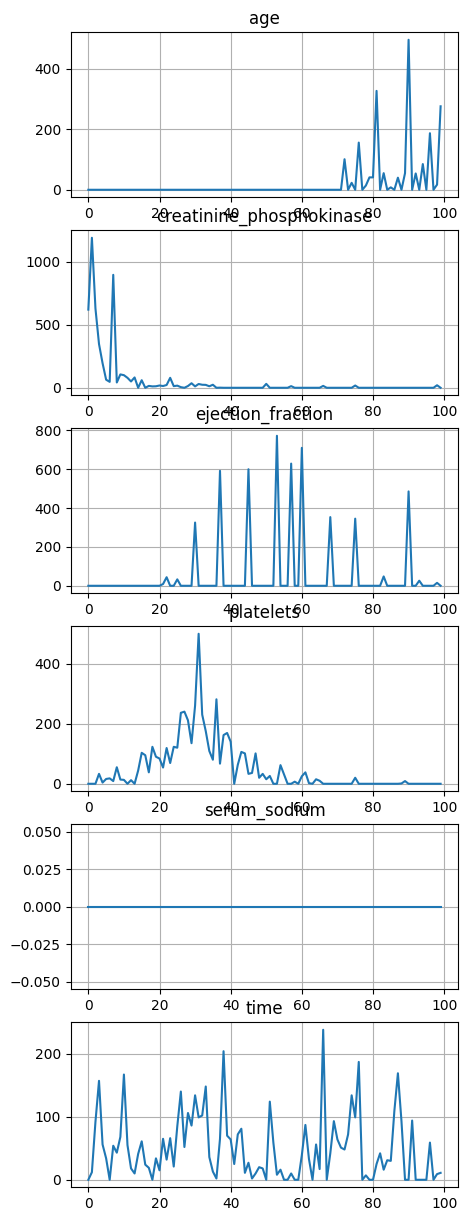

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

def rango(dataset):
  return np.max(dataset)-np.min(dataset)

def sepbins(dataset,almacen, bins):
  print(type(dataset))
  datint=rango(dataset)/bins
  sorted_dataset=sorted(dataset)
  tamint=len(dataset)
  for j in range(0,bins):
    for i in range((len(dataset))):
      if(datint *j<=dataset[i]<=datint*(j+1)):
        almacen[j]+=1

def filtrado(metadata):
  id = np.zeros(len(metadata))
  for i, col in enumerate(metadata):
      x = fallos[col]
      cont = 0
      for j in range(len(x)):
          if x[j] == 1 or x[j] == 0:
              id[i] = 1
              break
  return id


bins=100
almacen=np.zeros(bins)
fallos=pd.read_csv("C:/Users/Rulig/OneDrive/Escritorio/apps/progra/python/PCD/heart_failure_clinical_records.csv")
columnas=fallos[:-1]
metadata=[col for col in columnas]
resfil=filtrado(metadata)
metadata_filtradot = [col for i, col in enumerate(metadata) if resfil[i] == 1]
metadata_filtrado=[col for i, col in enumerate(metadata) if resfil[i] == 0]
print(metadata_filtrado)
fig, ax = plt.subplots(len(metadata_filtrado), figsize=(5,15))
for idx, col in enumerate(metadata_filtrado):
  print(col)
  x=fallos[col]
  almacen = np.zeros(bins) 
  sepbins(x,almacen,bins)
  ax[idx].plot(almacen,label=f'{col}')
  ax[idx].grid(True)
  ax[idx].set_title(col)

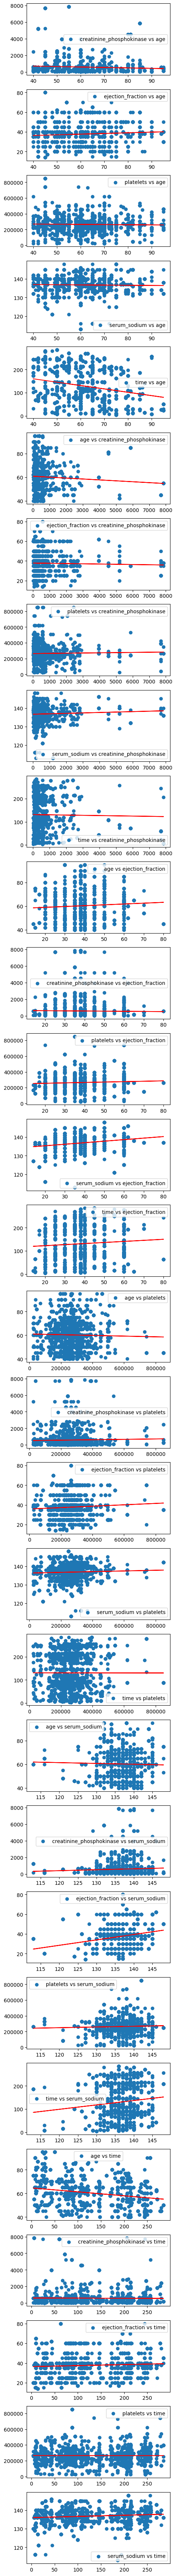

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
""""
Calculando los coeficientes de la regresion lineal y el error residual

Retorna: tupla con coeficientes a_0, a_1 y el error residual r_
"""
def coef(x,y):
  s_x=sum(x)
  s_y=sum(y)
  s_xy=np.zeros(len(x))
  s_xx=np.zeros((len(x)))
  r_=0.0
  for i in range(len(x)):
    s_xy[i]=x[i]*y[i]
    s_xx[i]=x[i]*x[i]
  s_xx=sum(s_xx)
  s_xy=sum(s_xy)
  a_1=(len(x)*s_xy-s_y*s_x)/(len(x)*s_xx-(s_x)**2)
  a_0=(s_y-a_1*s_x)/len(x)
  for i in range(len(x)):
    r_=r_+(a_0+a_1*x[i]-y[i])**2
  return a_0,a_1,r_

def filtrado(metadata):
  id = np.zeros(len(metadata))
  for i, col in enumerate(metadata):
      x = fallos[col]
      cont = 0
      for j in range(len(x)):
          if x[j] == 1 or x[j] == 0:
              id[i] = 1
              break
  return id

fallos=pd.read_csv("C:/Users/Rulig/OneDrive/Escritorio/apps/progra/python/PCD/heart_failure_clinical_records.csv")
columnas=fallos[:-1]
metadata=[col for col in columnas]
resfil=filtrado(metadata)
metadata_filtradot = [col for i, col in enumerate(metadata) if resfil[i] == 1]
metadata_filtrado=[col for i, col in enumerate(metadata) if resfil[i] == 0]
combinaciones = [(col1, col2) for col1 in metadata_filtrado for col2 in metadata_filtrado if col1 != col2]
fig, ax = plt.subplots(len(combinaciones),figsize=(5,3*len(combinaciones)))
for idx, (col1, col2) in enumerate(combinaciones):
  x=fallos[col1]
  y=fallos[col2]
  ax[idx].scatter(x, y, label=f'{col2} vs {col1}')
  ax[idx].legend()
  a_0,a_1,r_1=coef(x,y)
  yprime=a_0+np.dot(a_1,x)
  ax[idx].plot(x,yprime,'r')
